# Research on car sales ads

Hundreds of free advertisements for vehicles are published on the site of Crankshaft List every day. The goal of research to determine which factors influence the price of a vehicle, using the data collected over the last few years. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
car_sales_df = pd.read_csv('/datasets/vehicles_us.csv', sep=',')

Number of rows

In [4]:
len(car_sales_df)

51525

In [5]:
car_sales_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
car_sales_df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
15714,14798,2014.0,jeep grand cherokee,excellent,6.0,gas,86621.0,automatic,SUV,white,1.0,2018-06-11,70
29338,34595,2015.0,gmc yukon,excellent,NaN,gas,86456.0,automatic,SUV,silver,1.0,2018-05-02,20
29611,3150,1999.0,chevrolet silverado,good,8.0,gas,243000.0,manual,truck,silver,1.0,2018-06-06,37
6905,22975,2012.0,ram 2500,excellent,6.0,diesel,119546.0,automatic,pickup,white,1.0,2018-11-08,76
48089,2500,1996.0,ford f250 super duty,fair,8.0,diesel,325000.0,manual,truck,red,1.0,2019-02-08,15


In [7]:
car_sales_df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Checking on NAs


Percentage of NAs

In [9]:
100*car_sales_df.isnull().sum()/car_sales_df.shape[0]

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

We see here is_4wd is the column with the most missing values.

In [10]:
car_sales_missing = car_sales_df.isna().sum()

The total number of missing values for each column:

In [11]:
car_sales_missing

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusion

The table consists of 13 columns and 51525 lines. Data contains columns with null values: model_year, cylinders, odometer, paint_color, is_4wd. Missing values in the column is_4wd are 50%. The part of the columns have data type float, that is requered convertion.

## Data preprocessing

In [12]:
#Working on 'model_years' missing values. I decided here to work with dictionaries
print('Grouping model per model_year to find correlations between the model and the year.')
print('')
model_grouped_year = car_sales_df.groupby('model')['model_year'].agg(lambda x: x.value_counts().index[0])
print(model_grouped_year)
models_keys = list(model_grouped_year.index)
year_values = list(model_grouped_year) 
dictionary_model = {models_keys[i]: year_values[i] for i in range(len(models_keys))}
print('')
print('')
print('The dictionary I created with model and model_year look like this:')
print(dictionary_model)
for i, val in car_sales_df['model'].iteritems():
    car_sales_df.loc[i,'model_year'] = dictionary_model[val]
print('')
print('')
print('New "model_year" column after replacing missing values is:')
print(car_sales_df['model_year'].value_counts())
print(car_sales_df['model_year'].value_counts().sum())

Grouping model per model_year to find correlations between the model and the year.

model
acura tl             2005.0
bmw x5               2012.0
buick enclave        2012.0
cadillac escalade    2007.0
chevrolet camaro     2014.0
                      ...  
toyota sienna        2004.0
toyota tacoma        2015.0
toyota tundra        2007.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64


The dictionary I created with model and model_year look like this:
{'acura tl': 2005.0, 'bmw x5': 2012.0, 'buick enclave': 2012.0, 'cadillac escalade': 2007.0, 'chevrolet camaro': 2014.0, 'chevrolet camaro lt coupe 2d': 2017.0, 'chevrolet colorado': 2016.0, 'chevrolet corvette': 2006.0, 'chevrolet cruze': 2014.0, 'chevrolet equinox': 2013.0, 'chevrolet impala': 2008.0, 'chevrolet malibu': 2013.0, 'chevrolet silverado': 2008.0, 'chevrolet silverado 1500': 2014.0, 'chevrolet silverado 1500 crew': 2018.0, 'chevrolet silverado 2500hd': 2006.0, 'chevrol

In [13]:
#Working on 'cylinders' missing values. (mean is 6.1252, median is 6 since the column should be integers I am going to choose median.)
cylinders_median = car_sales_df['cylinders'].median()
car_sales_df['cylinders'] = car_sales_df['cylinders'].fillna(cylinders_median)
print('New "cylinders" column after replacing missing values is:')
print('')
print(car_sales_df['cylinders'].value_counts())

New "cylinders" column after replacing missing values is:

6.0     20960
8.0     15844
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64


In [14]:
#Working on 'odometer' missing values.
odometer_median = car_sales_df['odometer'].median()
car_sales_df['odometer'] = car_sales_df['odometer'].fillna(odometer_median)
print('New "odometer" column after replacing missing values is:')
print('')
print(car_sales_df['odometer'].value_counts())

New "odometer" column after replacing missing values is:

113000.0    7992
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
51595.0        1
111381.0       1
155940.0       1
43402.0        1
74063.0        1
Name: odometer, Length: 17762, dtype: int64


In [15]:
#Working on 'paint_color' missing values.
car_sales_df['paint_color'] = car_sales_df['paint_color'].fillna(value="not_specified")
print('New "paint_color" column after replacing missing values is:')
print('')
print(car_sales_df['paint_color'].value_counts())

New "paint_color" column after replacing missing values is:

white            10029
not_specified     9267
black             7692
silver            6244
grey              5037
blue              4475
red               4421
green             1396
brown             1223
custom            1153
yellow             255
orange             231
purple             102
Name: paint_color, dtype: int64


In [16]:
#Working on 'is_4wd' missing values.
car_sales_df['is_4wd'] = car_sales_df['is_4wd'].fillna(value=0)
print('New "is_4wd" column after replacing missing values is:')
print('')
print(car_sales_df['is_4wd'].value_counts())

New "is_4wd" column after replacing missing values is:

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64


In [17]:
car_sales_df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Columns that require data type conversion: model_year - float to int (year is a whole number) cylinders - float to int odometer - float to int is_4wd - float to boolean (can contain only 2 values, so boolean is appropriate) date_posted - object to datetime - obviously, for convenience

In [18]:
#filling NaN values with 0.0 and converting values of column is_4wd to boolean
car_sales_df['is_4wd'] = car_sales_df['is_4wd'].fillna(0.0)
car_sales_df['is_4wd'] = car_sales_df['is_4wd'].astype('bool')

In [19]:
#converting date_posted
car_sales_df['date_posted'] = pd.to_datetime(car_sales_df['date_posted'], format='%Y-%m-%d')

In [20]:
#dropping missing values
car_sales_df.dropna(inplace=True)

In [21]:
#converting data types
for col in ['model_year', 'cylinders', 'odometer']:
    car_sales_df[col] = car_sales_df[col].astype(int)

In [22]:
car_sales_df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [23]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 5.2+ MB


In [ ]:
df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))

The rows of model_year and cylinders contain information from the technical passport of the vehicles and not always the person who publishes the advertisement for the sale of the vehicle has this document at hand. Perhaps this is why these columns have missing values.

There are also missing values in the odometer column in our table, probably due to the fact that the odometer is too huge, while the rest of the vehicle is in excellent condition, and thus the advertiser does not want to weed out some potential buyers in advance, and will provide this information upon request. Another reason that there are missing values in the odometer column may be that the advertiser publishing the advertisement is not near the vehicle and cannot check the exact odometer data.

In the column is_4wd, all filled lines indicate 1, that is, a vehicle with four-wheel drive, the lines remain empty, which obviously indicates that the vehicle does not have four-wheel drive and the values can be filled in with 0.

The appearance of missing values in the painted_color column, in our opinion, is the most difficult to explain. Possible reasons may be as follows: the column was accidentally missed, the advertiser does not consider the color of the vehicle as an essential parameter, it is possible that a photo is attached to the ad and the color is visible on it, it can also be assumed that the advertiser found it difficult to indicate the color in accordance with the technical passport of the vehicle.

We believe that it is inappropriate to fill in the missing values for columns: model_year, cylinders, odometer, paint_color with any of the available ones, because it is difficult to guess what these values might be. For example, the color of the vehicles can be both common and rare or single. Or odometer indicator may be any and etc. We dropped lines with missing values. We filled missing values in the column is_4wd with 0 because it is obviously that this data has only two values 0 or 1 and converted datato boolean type. All values have data types int or object, excluding date_posted which was converted to datetime64 and is_4wd - to bool.

## Make calculations and add them to the table

In [23]:
#Adding day of week, month and year columns(when the ad was placed)
car_sales_df['weekday'] = car_sales_df['date_posted'].dt.weekday
car_sales_df['month'] = car_sales_df['date_posted'].dt.month
car_sales_df['year'] = car_sales_df['date_posted'].dt.year

In [24]:
#Adding vehicle_age column
car_sales_df['vehicle_age'] = car_sales_df['year'] - car_sales_df['model_year'] + 1

In [25]:
#Adding mileage per year column
car_sales_df['mileage_per_year'] = car_sales_df['odometer'] // car_sales_df['vehicle_age']

In [26]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price               51525 non-null int64
model_year          51525 non-null int64
model               51525 non-null object
condition           51525 non-null object
cylinders           51525 non-null int64
fuel                51525 non-null object
odometer            51525 non-null int64
transmission        51525 non-null object
type                51525 non-null object
paint_color         51525 non-null object
is_4wd              51525 non-null bool
date_posted         51525 non-null datetime64[ns]
days_listed         51525 non-null int64
weekday             51525 non-null int64
month               51525 non-null int64
year                51525 non-null int64
vehicle_age         51525 non-null int64
mileage_per_year    51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(10), object(6)
memory usage: 7.1+ MB



In the condition column, replacing string values with a numeric scale:

In [27]:
#function fo replace:
def condition_to_numeric(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0

In [28]:
#applying function:
car_sales_df['condition'] = car_sales_df['condition'].apply(condition_to_numeric)

In [29]:
car_sales_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,vehicle_age,mileage_per_year
0,9400,2012,bmw x5,2,6,gas,145000,automatic,SUV,not_specified,True,2018-06-23,19,5,6,2018,7,20714
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,6,14784
2,5500,2011,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,9,12222
3,1500,2013,ford f-150,1,8,gas,113000,automatic,pickup,not_specified,False,2019-03-22,9,4,3,2019,7,16142
4,14900,2015,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,5,16180


## Carry out exploratory data analysis

In [30]:
# describing parameter price 
car_sales_df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

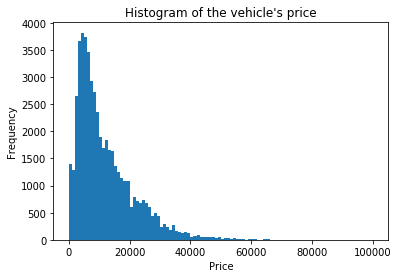

In [31]:
#plotting histogram
car_sales_df['price'].plot(kind='hist', bins=100, range=[0,100000], title='Histogram of the vehicle\'s price')
plt.xlabel('Price')
plt.show( )

The main price range from about 0 to 20000. There is outliers with price more than 60000

In [32]:
#describing parameter vehicle_age 
car_sales_df['vehicle_age'].describe()

count    51525.000000
mean         7.786181
std          3.523578
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         17.000000
Name: vehicle_age, dtype: float64

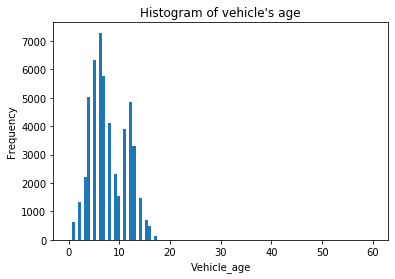

In [33]:
#plotting histogram
car_sales_df['vehicle_age'].plot(kind='hist', bins=100, range=(0,60), title='Histogram of vehicle\'s age')
plt.xlabel('Vehicle_age')
plt.show( )

The age of the most vehicles is in the range from 0 to 20 years. There are separate values after 30 years.

In [34]:
#describing parameter mileage
car_sales_df['odometer'].describe()

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

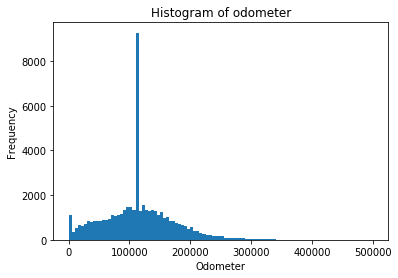

In [35]:
#plotting histogram
car_sales_df['odometer'].plot(kind='hist', bins=100, range=(0,500000), title='Histogram of odometer')
plt.xlabel('Odometer')
plt.show( )

The main values of the odometer indicator are in the range from 0 to 200,000. There are a lot of new vehicles. There are a number of cars with mileage from 200,000 to 350,000 and individual values after 350,000

In [36]:
#describing parameter cylinders 
car_sales_df['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

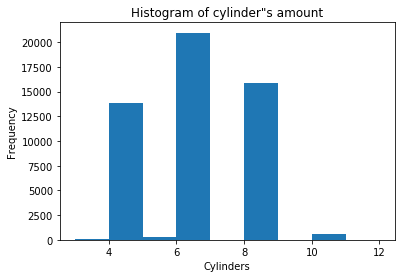

In [37]:
#plotting histogram
car_sales_df['cylinders'].plot(kind='hist', bins=9, title='Histogram of cylinder"s amount')
plt.xlabel('Cylinders')
plt.show( )

Mostly vehicles for sale have 4, 6, or 8 cylinders.

In [38]:
#describing parameter condition 
car_sales_df['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

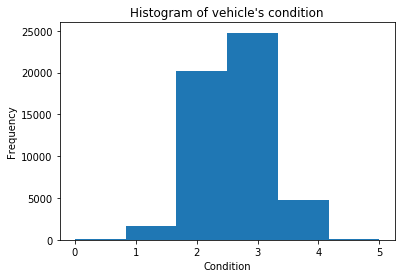

In [39]:
#plotting histogram
car_sales_df['condition'].plot(kind='hist', bins=6, title='Histogram of vehicle\'s condition')
plt.xlabel('Condition')
plt.show( )

The condition of vehicles is mainly good (2) or excelent (3).

In [40]:
car_sales_df[['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']].describe()

,price,vehicle_age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,7.786181,115162.352179,6.112450,2.637535
std,10040.803015,3.523578,59909.264385,1.573784,0.712447
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,5.000000,79181.000000,4.000000,2.000000
50%,9000.000000,7.000000,113000.000000,6.000000,3.000000
75%,16839.000000,11.000000,146541.000000,8.000000,3.000000
max,375000.000000,17.000000,990000.000000,12.000000,5.000000


In [41]:
car_sales_df['cylinders'].value_counts()

6     20960
8     15844
4     13864
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64

In [42]:
car_sales_df['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [43]:
#removing the outliers 
good_data = car_sales_df.query('price <= 60000 and vehicle_age <= 30 and odometer <= 350000 and '
                                'cylinders in (4, 6, 8, 10) and '
                                'condition in (1,2,3,4)')

In [44]:
#storing outliers in a separate DataFrame
data_outliers = car_sales_df[~car_sales_df.index.isin(good_data.index)]

In [45]:
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 53 to 51521
Data columns (total 18 columns):
price               723 non-null int64
model_year          723 non-null int64
model               723 non-null object
condition           723 non-null int64
cylinders           723 non-null int64
fuel                723 non-null object
odometer            723 non-null int64
transmission        723 non-null object
type                723 non-null object
paint_color         723 non-null object
is_4wd              723 non-null bool
date_posted         723 non-null datetime64[ns]
days_listed         723 non-null int64
weekday             723 non-null int64
month               723 non-null int64
year                723 non-null int64
vehicle_age         723 non-null int64
mileage_per_year    723 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(11), object(5)
memory usage: 102.4+ KB


In [46]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50802 entries, 0 to 51524
Data columns (total 18 columns):
price               50802 non-null int64
model_year          50802 non-null int64
model               50802 non-null object
condition           50802 non-null int64
cylinders           50802 non-null int64
fuel                50802 non-null object
odometer            50802 non-null int64
transmission        50802 non-null object
type                50802 non-null object
paint_color         50802 non-null object
is_4wd              50802 non-null bool
date_posted         50802 non-null datetime64[ns]
days_listed         50802 non-null int64
weekday             50802 non-null int64
month               50802 non-null int64
year                50802 non-null int64
vehicle_age         50802 non-null int64
mileage_per_year    50802 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(11), object(5)
memory usage: 7.0+ MB


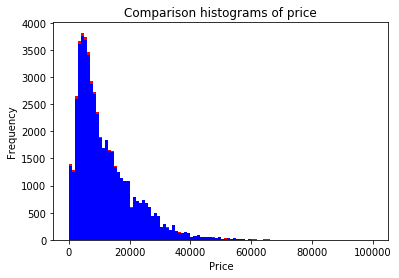

In [47]:
car_sales_df['price'].plot(kind='hist', bins=100, range=(0,100000), color='red')
good_data['price'].plot(kind='hist', bins=100, range=(0,100000), color='blue')
plt.xlabel('Price')
plt.title('Comparison histograms of price')
plt.show( )

The differences between the charts are not significant, the number of ads has slightly decreased for all price categories, and there are no ads with too high a price on the new histogram.

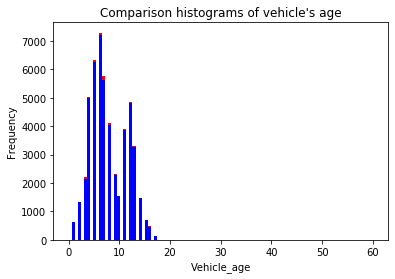

In [48]:
car_sales_df['vehicle_age'].plot(kind='hist', bins=100, range=(0,60), color='red')
good_data['vehicle_age'].plot(kind='hist', bins=100, range=(0,60), color='blue')
plt.xlabel('Vehicle_age')
plt.title('Comparison histograms of vehicle\'s age')
plt.show( )

The histogram turned out to be smoother and there is no "long tail" in the form of rare ads for the sale of very old vehicles.

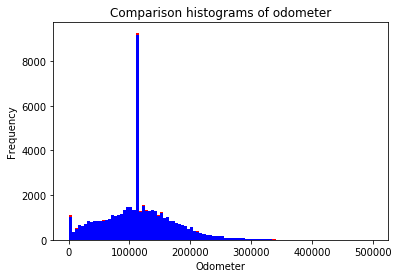

In [49]:
car_sales_df['odometer'].plot(kind='hist', bins=100, range=(0,500000), color='red')
good_data['odometer'].plot(kind='hist', bins=100, range=(0,500000), color='blue')
plt.xlabel('Odometer')
plt.title('Comparison histograms of odometer')
plt.show( )

On the new histogram in comparison with the old one, the number of ads with zero odometer decreased and too high values were cut off.

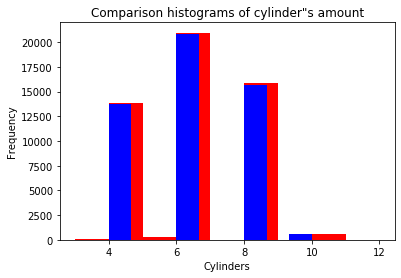

In [50]:
car_sales_df['cylinders'].plot(kind='hist', bins=9, color='red')
good_data['cylinders'].plot(kind='hist', bins=9, color='blue')
plt.xlabel('Cylinders')
plt.title('Comparison histograms of cylinder"s amount')
plt.show( )

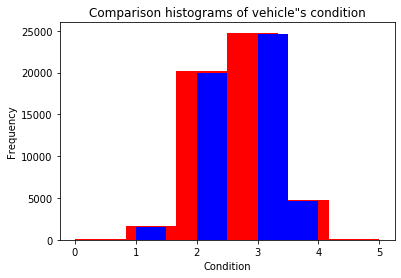

In [51]:
car_sales_df['condition'].plot(kind='hist', bins=6, color='red')
good_data['condition'].plot(kind='hist', bins=6, color='blue')
plt.xlabel('Condition')
plt.title('Comparison histograms of vehicle"s condition')
plt.show( )

In [52]:
#describing parameter days_listed
good_data['days_listed'].describe()

count    50802.000000
mean        39.572084
std         28.221799
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The minimum ad was shown for less than a day. The maximum number of days to publish an ad was 267 days. On average, an advertisement for the sale of a vehicle is published for 40 days. Average deviates to the right.

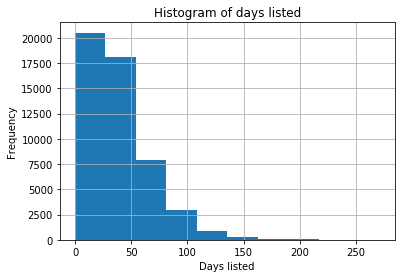

In [53]:
good_data['days_listed'].hist()
plt.ylabel('Frequency')
plt.xlabel('Days listed')
plt.title('Histogram of days listed')
plt.show( )

Most ads were displayed between 0 and 50 days.

In [54]:
good_data_mean = round(good_data['days_listed'].mean(), 0)
print('Mean value of days_listed is {}'.format(good_data_mean))

Mean value of days_listed is 40.0


In [55]:
good_data_median = round(good_data['days_listed'].median(), 0)
print('Median value of days_listed is {}'.format(good_data_median))

Median value of days_listed is 33.0


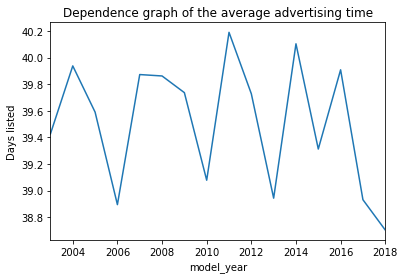

In [56]:
good_data.groupby("model_year")['days_listed'].mean().plot()
plt.ylabel('Days listed')
plt.title('Dependence graph of the average advertising time')
plt.show( )

Since 2000, ads have shown a number of days close to the average. Older vehicles had different peaks: sometimes the ads were removed quickly, and sometimes they were listed for an abnormally long time.

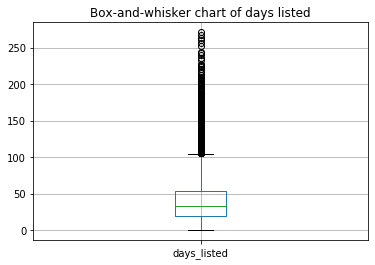

In [57]:
good_data.boxplot(column='days_listed')
plt.title('Box-and-whisker chart of days listed')
plt.show()

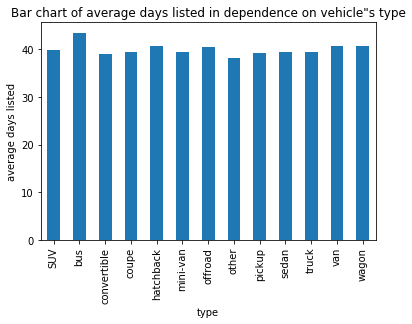

In [58]:
good_data.groupby("type")['days_listed'].mean().plot(kind='bar')
plt.title('Bar chart of average days listed in dependence on vehicle"s type')
plt.ylabel('average days listed')
plt.show()

In [59]:
good_data.query('type == "bus"').groupby('model')['days_listed'].mean().head(10)

model
ford econoline      45.470588
ford explorer       28.800000
ford f-250          53.000000
hyundai santa fe    74.000000
Name: days_listed, dtype: float64

It can be concluded that the ads for the sale of buses were shown on average longer than the sale of other vehicles. In particular, the ads of the sale hyundai santa fe hung harmful for almost twice as long.

In [60]:
good_data.query('days_listed <= 1').groupby('type')['odometer'].mean().head(20)

type
SUV             97577.229167
convertible     53720.666667
coupe           62334.285714
hatchback      117143.111111
mini-van       113059.333333
offroad        116625.000000
pickup         120097.870968
sedan          112987.469388
truck          113680.351852
van            110182.428571
wagon          121307.000000
Name: odometer, dtype: float64

All ads which were displayed less then 1 day was about vehicles with mileage of about 100000 km and more, excepting for convertibles.

In [61]:
#Analyzing the number of ads
vehicles_number_ads_by_type = good_data.pivot_table(index='type', values='price', aggfunc='count')
vehicles_number_ads_by_type.columns = ['ads_count']
vehicles_number_ads_by_type.head(15)

,ads_count
type,
SUV,12329
bus,24
convertible,436
coupe,2275
hatchback,1035
mini-van,1153
offroad,213
other,255
pickup,6877


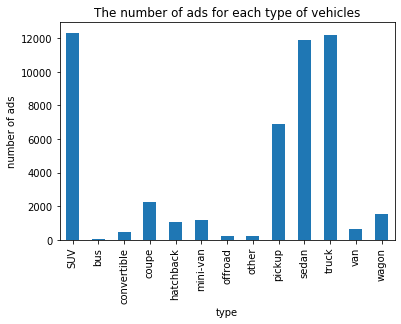

In [62]:
vehicles_number_ads_by_type['ads_count'].plot.bar()
plt.title('The number of ads for each type of vehicles')
plt.ylabel('number of ads')
plt.show()

The most numbers of ads of SUVs and trucks vehicles.

In [63]:
# Analyzing the average price for each type of vehicle
vehicles_mean_price_by_type = round(car_sales_df.pivot_table(index='type', values='price'), 2)
vehicles_mean_price_by_type.head(15)

,price
type,
SUV,11149.40
bus,17135.67
convertible,14575.88
coupe,14353.44
hatchback,6868.51
mini-van,8193.18
offroad,14292.29
other,10989.71
pickup,16057.41


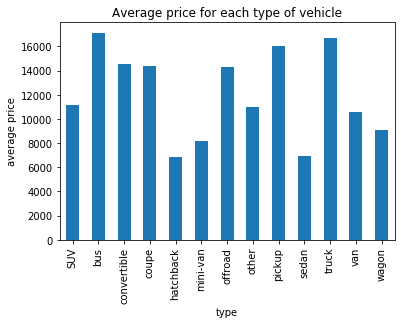

In [64]:
vehicles_mean_price_by_type['price'].plot.bar()
plt.title('Average price for each type of vehicle')
plt.ylabel('average price')
plt.show()

The most expensive type of vehicles is bus and the cheapest is hatchback.

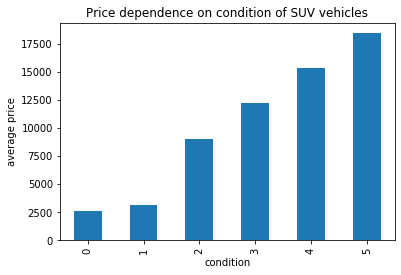

In [65]:
#Analyzing whether the price depends on condition of SUV vehicles
suv_mean_price_by_condition = car_sales_df.query('type == "SUV"').pivot_table(index = 'condition', values = 'price')
suv_mean_price_by_condition_plot = suv_mean_price_by_condition['price'].plot.bar()
suv_mean_price_by_condition_plot.set_title('Price dependence on condition of SUV vehicles')
plt.ylabel('average price')
plt.show()

There is a direct relationship between the condition of the SUV vehicle and its price, which is obvious. So the better the condition of the vehicle, the more expensive it is.

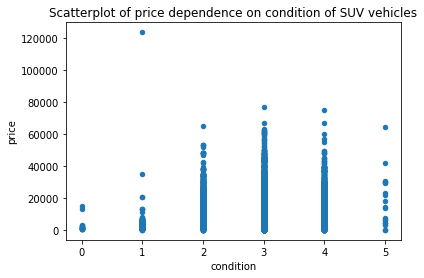

In [66]:

#Plotting scatterplot
car_sales_df.query('type == "SUV"').plot(x='condition', y='price', kind='scatter')
plt.title('Scatterplot of price dependence on condition of SUV vehicles')
plt.show()

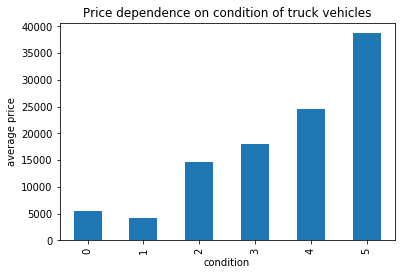

In [67]:
#Analyzing whether the price depends on condition of truck vehicles
truck_mean_price_by_condition = car_sales_df.query('type == "truck"').pivot_table(index = 'condition', values = 'price')
truck_mean_price_by_condition_plot = truck_mean_price_by_condition['price'].plot.bar()
truck_mean_price_by_condition_plot.set_title('Price dependence on condition of truck vehicles')
plt.ylabel('average price')
plt.show()

There is also a relationship between the condition of the truck vehicle and its price, the better the more expensive. But there is a slightly non-standard situation that truck vehicles in salvage condition (0) are more expensive than in fair condition (1). Most likely this can be explained by the fact that initially the cost of the truck vehicles were significantly different. And it is possible that much more expensive models are in salvage condition, then in fair condition.

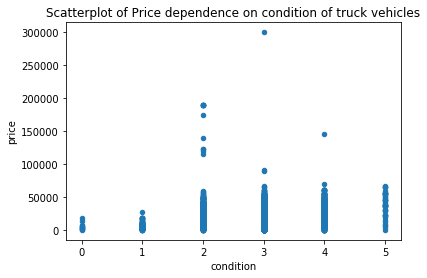

In [68]:
#Plotting scatterplot
car_sales_df.query('type == "truck"').plot(x='condition', y='price', kind='scatter')
plt.title('Scatterplot of Price dependence on condition of truck vehicles')
plt.show()

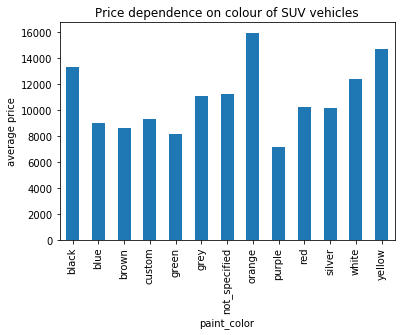

In [69]:

#Analyzing whether the price depends on paint_color of SUV vehicles
suv_mean_price_by_paint = car_sales_df.query('type == "SUV"').pivot_table(index = 'paint_color', values = 'price')
suv_mean_price_by_paint_plot = suv_mean_price_by_paint['price'].plot.bar()
suv_mean_price_by_paint_plot.set_title('Price dependence on colour of SUV vehicles')
plt.ylabel('average price')
plt.show()

Most likely, the color affects the value of the vehicle, but there is no definite relationship.

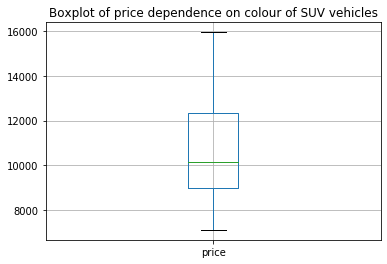

In [70]:
#ploting box-and-whisker chart
suv_mean_price_by_paint.boxplot()
plt.title('Boxplot of price dependence on colour of SUV vehicles')
plt.show()

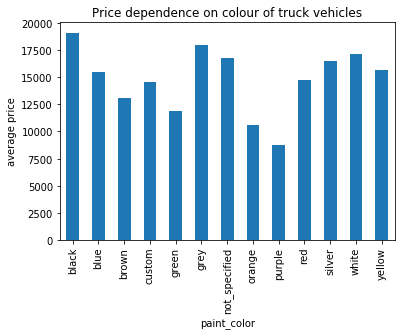

In [71]:
#Analyzing whether the price depends on paint_color of truck vehicles
truck_mean_price_by_paint = car_sales_df.query('type == "truck"').pivot_table(index = 'paint_color', values = 'price')
truck_mean_price_by_paint_plot = truck_mean_price_by_paint['price'].plot.bar()
truck_mean_price_by_paint_plot.set_title('Price dependence on colour of truck vehicles')
plt.ylabel('average price')
plt.show()

Most likely, the color affects the value of the vehicle, but there is no definite relationship.

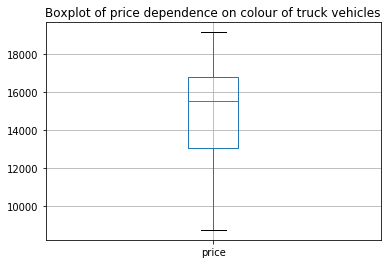

In [72]:
#ploting box-and-whisker chart
truck_mean_price_by_paint.boxplot()
plt.title('Boxplot of price dependence on colour of truck vehicles')
plt.show()

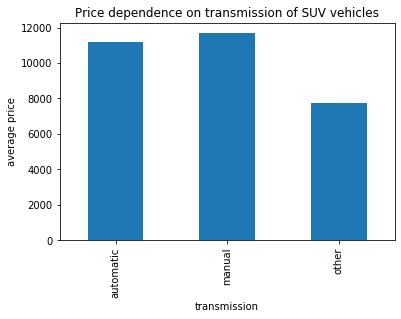

In [73]:
#Analyzing whether the price depends on transmission of SUV vehicles
suv_mean_price_by_transmission = car_sales_df.query('type == "SUV"').pivot_table(index = 'transmission', values = 'price')
suv_mean_price_by_transmission_plot = suv_mean_price_by_transmission['price'].plot.bar()
suv_mean_price_by_transmission_plot.set_title('Price dependence on transmission of SUV vehicles')
plt.ylabel('average price')
plt.show()

Manual transmission of SUV vehicles costs a litle bit more expensive.

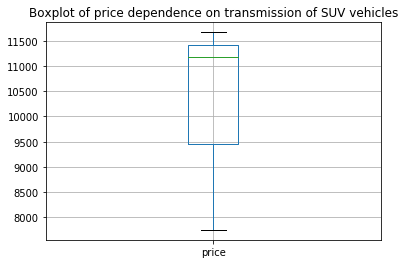

In [74]:
#ploting box-and-whisker chart
suv_mean_price_by_transmission.boxplot()
plt.title('Boxplot of price dependence on transmission of SUV vehicles')
plt.show()

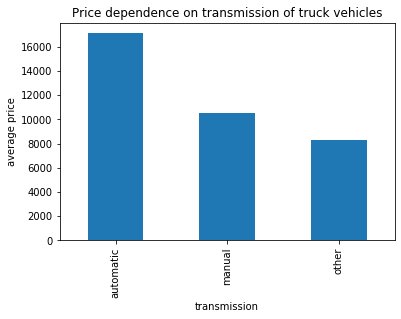

In [75]:
#Analyzing whether the price depends on transmission of truck vehicles
truck_mean_price_by_transmission = car_sales_df.query('type == "truck"').pivot_table(index = 'transmission', values = 'price')
truck_mean_price_by_transmission_plot = truck_mean_price_by_transmission['price'].plot.bar()
truck_mean_price_by_transmission_plot.set_title('Price dependence on transmission of truck vehicles')
plt.ylabel('average price')
plt.show()

The price of the truck vehicles with automatic transmission is significantly higher than with manual or others.

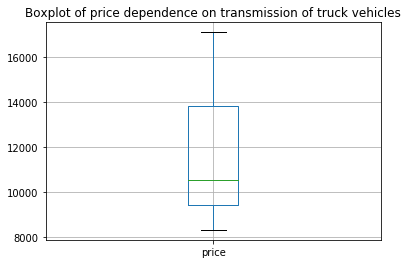

In [76]:
#ploting box-and-whisker chart
truck_mean_price_by_transmission.boxplot()
plt.title('Boxplot of price dependence on transmission of truck vehicles')
plt.show()

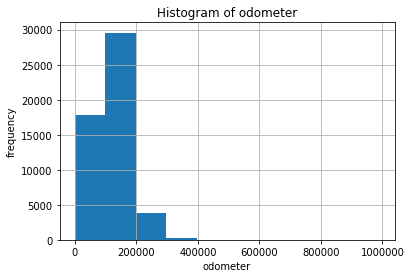

In [77]:
car_sales_df['odometer'].hist()
plt.title('Histogram of odometer')
plt.xlabel('odometer')
plt.ylabel('frequency')
plt.show()

In [78]:
#function for categorizing mileage
def categorize_mileage(mileage):
    if mileage < 50000:
        return '0-50k miles'
    if (mileage >= 50000) and (mileage < 100000):
        return '50-100k miles'
    if (mileage >= 100000) and (mileage < 150000):
        return '100k-150k miles'
    if (mileage >= 150000) and (mileage < 200000):
        return '150k-200k miles'
    if (mileage >= 200000):
        return '>200k miles'

In [79]:
#applying function
car_sales_df['mileage_category'] = car_sales_df['odometer'].apply(categorize_mileage)

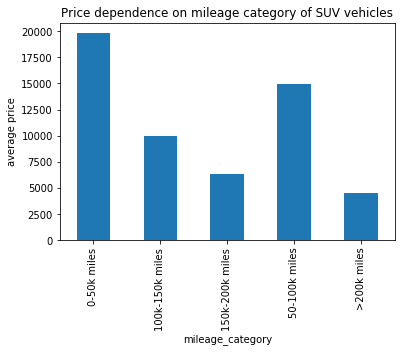

In [80]:
#Analyzing whether the price depends on mileage_category of SUV vehicles
suv_mean_price_by_mileage_category = car_sales_df.query('type == "SUV"').pivot_table(index = 'mileage_category', values = 'price')
suv_mean_price_by_mileage_category_plot = suv_mean_price_by_mileage_category['price'].plot.bar(title='Price dependence on mileage category of SUV vehicles')
plt.ylabel('average price')
plt.show()

The odometer of SUV vehicles influence on its price. The lower odometer the higher price.

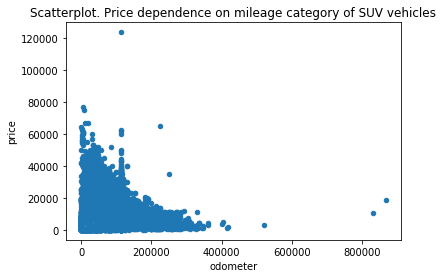

In [81]:
#Plotting scatterplot
car_sales_df.query('type == "SUV"').plot(x='odometer', y='price', kind='scatter', title='Scatterplot. Price dependence on mileage category of SUV vehicles')
plt.show()

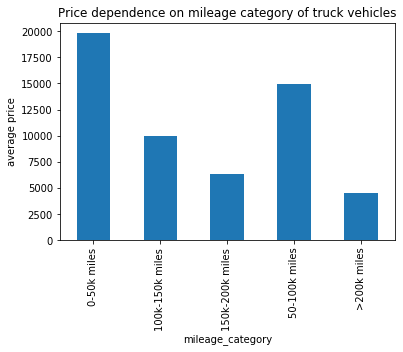

In [82]:
#Analyzing whether the price depends on mileage_category of truck vehicles
truck_mean_price_by_mileage_category = car_sales_df.query('type == "truck"').pivot_table(index = 'mileage_category', values = 'price')
truck_mean_price_by_mileage_category_plot = suv_mean_price_by_mileage_category['price'].plot.bar(title='Price dependence on mileage category of truck vehicles')
plt.ylabel('average price')
plt.show()

The odometer of truck vehicles influence on its price. The lower odometer the higher price.

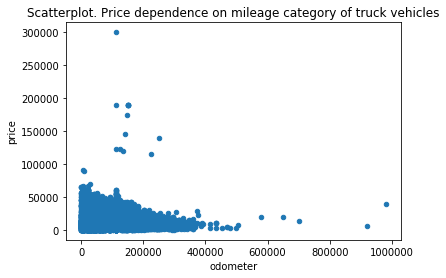

In [83]:
#Plotting scatterplot
car_sales_df.query('type == "truck"').plot(x='odometer', y='price', kind='scatter', title='Scatterplot. Price dependence on mileage category of truck vehicles')
plt.show()

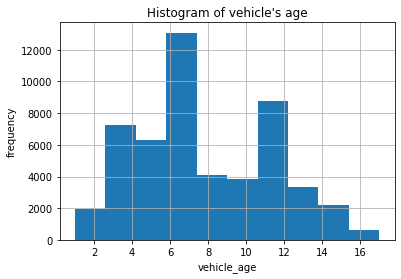

In [84]:
car_sales_df['vehicle_age'].hist()
plt.title('Histogram of vehicle\'s age')
plt.xlabel('vehicle_age')
plt.ylabel('frequency')
plt.show()

In [85]:
#function for categorizing age
def age_of_vehicle(age):
    if age < 10:
        return '0-10 years'
    if (age >= 10) and (age < 20):
        return '10-20 years'
    if (age >= 20) and (age < 30):
        return '20-30 years'
    if (age >= 30) and (age < 40):
        return '30-40 years'
    if (age >= 40):
        return '>40 years'

In [86]:
#applying function
car_sales_df['age_category'] = car_sales_df['vehicle_age'].apply(age_of_vehicle)

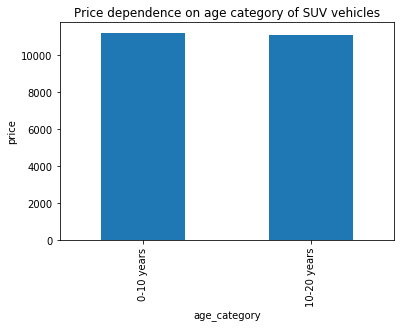

In [87]:
#Analyzing whether the price depends on age_category of SUV vehicles
suv_mean_price_by_age_category = car_sales_df.query('type == "SUV"').pivot_table(index = 'age_category', values = 'price')
suv_mean_price_by_age_category_plot = suv_mean_price_by_age_category['price'].plot.bar()
suv_mean_price_by_age_category_plot.set_title('Price dependence on age category of SUV vehicles')
plt.ylabel('price')
plt.show()

The price depends on age of the SUV vehicle. As a rule, the younger the vehicle, the more expensive it is. However on the histgram vehicles older than 40 years cost more expensive than vehicles from 10 to 20 years. Maybe these are rare vehicles.

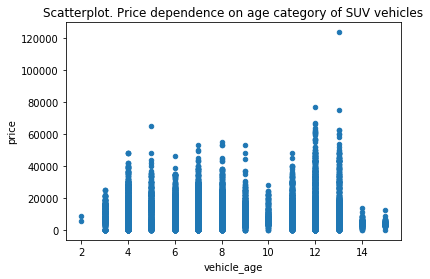

In [88]:
#Plotting scatterplot
car_sales_df.query('type == "SUV"').plot(x='vehicle_age', y='price', kind='scatter')
plt.title('Scatterplot. Price dependence on age category of SUV vehicles')
plt.show()

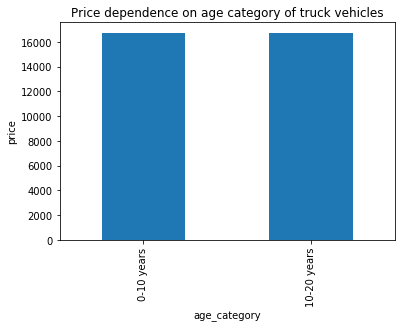

In [89]:
#Analyzing whether the price depends on age_category of truck vehicles
truck_mean_price_by_age_category = car_sales_df.query('type == "truck"').pivot_table(index='age_category', values = 'price')
truck_mean_price_by_age_category_plot = truck_mean_price_by_age_category['price'].plot.bar()
truck_mean_price_by_age_category_plot.set_title('Price dependence on age category of truck vehicles')
plt.ylabel('price')
plt.show()

The price depends on age of the truck vehicle. As a rule, the younger the vehicle, the more expensive it is. However on the histgram vehicles older than 40 years cost more expensive than vehicles from 10 to 20 years. Maybe these are rare vehicles.

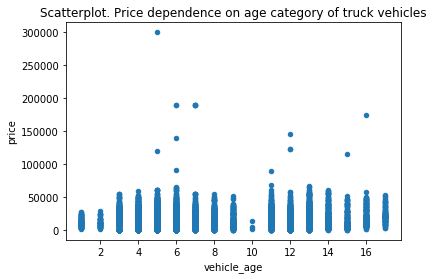

In [90]:
#Plotting scatterplot
car_sales_df.query('type == "truck"').plot(x='vehicle_age', y='price', kind='scatter')
plt.title('Scatterplot. Price dependence on age category of truck vehicles')
plt.show()

## Overall conclusion

We analyzed a table consisting of 13 columns and 51525 lines. The condition of most vehicles was good or excellent. The shortest ad time was less than a day and the longest publishing period was 267 days. On average, an advertisement for the sale of a vehicle was published for 40 days. Average deviated to the right. It was striking that the ads for the sale of buses were shown on average longer than the sale of other vehicles. The biggest numbers of ads referred to SUVs and trucks vehicles.The most expensive type of vehicles was bus the cheapest one was hatchback. We also observed and stated a direct relationship between some important parameter and the price of the vehicle. For example such advantages as good condition of the price, automatic transmission, low odometer and young age of the vehicle essentially increased the price. At the same time we saw some interesting exceptions, like that manual transmission of SUV vehicles was a little bit more expensive or unique old vehicles (so-called “old-timer) were offered at very high price. Most likely it seemed, that the color affected the value of the vehicle as well, but there was no definitive relationship found.